# ВЫДЕЛЕНИЕ КЛЮЧЕВЫХ СЛОВ ДЛЯ ПОСЛЕДУЮЩЕГО ИСПОЛЬЗОВАНИЯ В ПОДГОТОВКЕ ЭМБЕДДИНГА К МОДЕЛЯМ КЛАССИФИКАЦИИ

Данильченко Вадим

In [4]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [58]:
import pandas as pd
df = pd.read_excel(r'c:\projects\d_general_allinone.xlsx')
df.head()

,intent_id,domain,labeled,message,mode,intent,nanswer,xmlcommand,classes,terms,groups,threshold_explicit,threshold_lowest
0,gi009,d_general,1,"а деньги , которые внесла они безвозвратно ушл...",активен,будут ли возвращены арестованные деньги?,Будут ли возвращены денежные средства и в каки...,NaN,"вопрос,ситуация","арест,поступление",Арест,NaN,NaN
1,gi009,d_general,1,а деньги которые они заморозили они вернуться ?,активен,будут ли возвращены арестованные деньги?,NaN,NaN,"вопрос,ситуация",NaN,Арест,NaN,NaN
2,gi009,d_general,1,а деньги приставы вернули ?,активен,будут ли возвращены арестованные деньги?,NaN,NaN,"вопрос,ситуация",NaN,Арест,NaN,NaN
3,gi009,d_general,1,а если арест со счета сняли удержанные средств...,активен,будут ли возвращены арестованные деньги?,NaN,NaN,"вопрос,ситуация","снятие,арест,счет",Арест,NaN,NaN
4,gi009,d_general,1,а когда деньги должны вернуться ?,активен,будут ли возвращены арестованные деньги?,NaN,NaN,"вопрос,когда",NaN,Арест,NaN,NaN


In [59]:
df.loc[74599, 'message']

'заключил с банком кредитный договор , а в приложение войти не могу , тк выдает старый номер телефона'

In [60]:
import re
from tqdm import trange

regex = re.compile("[А-Яа-я]+")

def words_only(text, regex=regex):
    return " ".join(regex.findall(text))


# df['text'] = df.message.str.lower()
# df['text'] = df.text.apply(lambda x: re.sub(r'[^а-яА-Я]', ' ', x))
# df['text'] = df.text.apply(lambda x: re.sub(r' \{2,}', ' ', x).strip())

text = []
for i in trange(df.shape[0]):
#     text.append(words_only(df.text.iloc[i]))
    text.append(re.sub(r' \{2,}', ' ', re.sub(r'[^а-яА-Я]', ' ', str(df.loc[i, 'message']).lower())))
    
df['text'] = text

100%|█████████████████████████████████████████████████████████████████████████| 77203/77203 [00:01<00:00, 76793.54it/s]


Результат:

In [61]:
from nltk.corpus import stopwords
mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д'] 
mystopwords.remove('не')

print(mystopwords)
def  remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""
df.text = df.text.apply(remove_stopwords)   

['и', 'в', 'во', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впрочем',

### Лемматизация

In [62]:
from pymystem3 import Mystem

In [63]:
%%time 
# from pymystem3 import Mystem
from pymorphy2 import MorphAnalyzer

# m = Mystem()
m = MorphAnalyzer()
def lemmatize(text, mystem=m):
    try:
#         return "".join(m.lemmatize(text)).strip()  
        return "".join(m.parse(text)[0].normal_form).strip()  
    except:
        return " "

df.text = df.text.apply(lemmatize)

Wall time: 18.9 s


In [64]:
df.head()

,intent_id,domain,labeled,message,mode,intent,nanswer,xmlcommand,classes,terms,groups,threshold_explicit,threshold_lowest,text
0,gi009,d_general,1,"а деньги , которые внесла они безвозвратно ушл...",активен,будут ли возвращены арестованные деньги?,Будут ли возвращены денежные средства и в каки...,NaN,"вопрос,ситуация","арест,поступление",Арест,NaN,NaN,деньги которые внесла безвозвратно ушли арест
1,gi009,d_general,1,а деньги которые они заморозили они вернуться ?,активен,будут ли возвращены арестованные деньги?,NaN,NaN,"вопрос,ситуация",NaN,Арест,NaN,NaN,деньги которые заморозили вернуться
2,gi009,d_general,1,а деньги приставы вернули ?,активен,будут ли возвращены арестованные деньги?,NaN,NaN,"вопрос,ситуация",NaN,Арест,NaN,NaN,деньги приставы вернуть
3,gi009,d_general,1,а если арест со счета сняли удержанные средств...,активен,будут ли возвращены арестованные деньги?,NaN,NaN,"вопрос,ситуация","снятие,арест,счет",Арест,NaN,NaN,арест счета сняли удержанные средства вернуться
4,gi009,d_general,1,а когда деньги должны вернуться ?,активен,будут ли возвращены арестованные деньги?,NaN,NaN,"вопрос,когда",NaN,Арест,NaN,NaN,деньги должны вернуться


In [76]:
df['intent'].unique()[270]

"LATIN &EVAL{code=_ret=setRowMode(ctx,'nochoice')_}"

### Удаление стоп-лемм

In [65]:
mystoplemmas = ['который','прошлый','сей', 'свой', 'наш', 'мочь', 'год']
def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""

df.text = df.text.apply(remove_stoplemmas)   

In [66]:
from collections import Counter

lemmata = []
for index, row in df.iterrows():
    lemmata += row['text'].split()
cnt = Counter(lemmata)
for i in cnt.most_common(10):
    print(i)

('не', 13433)
('кредит', 9510)
('карта', 7557)
('могу', 7514)
('почему', 5693)
('карту', 4864)
('хочу', 4723)
('банк', 3956)
('карты', 3890)
('карте', 3871)


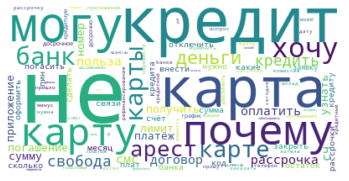

In [67]:
from wordcloud import *
word_freq = [i for i in cnt.most_common(100)]
wd = WordCloud(background_color = 'white')
wd.generate_from_frequencies(dict(word_freq))
plt.figure()
plt.imshow(wd, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Извлечение ключевых словосочетаний


Ключевые слова и словосочетания сложно определить формально. Поскольку определений ключевых слов и словосочетаний множество, существует масса методов их извлечения:
* с учителем VS без учителя
* частотные VS посложнее
* из одного текста VS из коллекции текстов
* слова (униграммы) VS биграммы VS $N$-граммы
* термины VS именованные сущности VS коллокации
* последовательные слова VS с использованием окна

### этапы извлечения ключевых слов и словосочетаний:
1. Порождение кандидатов
2. Оценка свойств кандидатов
3. Выбор лучших кандидатов

### методы извлечения ключевых слов и словосочетаний:
* Морфологические шаблоны
* Меры ассоциации биграмм: PMI, T-Score, LLR
* Графовые методы: TextRank [Mihalcea, Tarau, 2004]
* RAKE [Rose et al., 2010]
* Синтаксические шаблоны


### Морфологические шаблоны

Можно использовать парсер  Yargy. 

Простейший шаблон ПРИЛ + СУЩ

```
S -> Adj<gnc-agr[1]> Noun<rt,gnc-agr[1]>; 
```

Переезжаем из DataFrame в списки:

In [107]:
tokens_by_topic = []
topic_names = []
for topic in df['intent'].unique():
#     if df['intent'].value_counts()[topic] > 100: 
#         print(topic)
    tokens = []
    sample = df[df['intent']==topic]#.sample(n=100)
    if len(sample.text.unique())==1:
        continue

#     sample.text = sample.text.str.lower()
#     sample.text = sample.text.apply(words_only)
#     sample.text = sample.text.apply(remove_stopwords) 
#     sample.text = sample.text.apply(lemmatize)
#     sample.text = sample.text.apply(remove_stoplemmas) 
    topic_names.append(topic) # имена топиков
    for i in range(len(sample)):
        tokens += sample.text.iloc[i].split()
    tokens_by_topic.append(tokens)

In [80]:
len(tokens_by_topic)

268

Выберем тему, из текстов про которую будем извлекать ключевые слова:

In [82]:
topic_id = 10
df['intent'].unique()[topic_id]

"заказать обратный звонок &EVAL{code=_ret=setRowMode(ctx,'*chat')_}"

### Использование мер связности 


$w_1, w_2$ -- два слова

$f(w_1), f(w_2)$ -- их частоты

$f(w_1, w_2)$ -- совместная частота биграммы $w_1 w_2$

$N$ -- число слов

$PMI(w_1, w_2) = \log \frac{f(w_1, w_2)}{f(w_1)f(w_2)}$

$T-score(w_1, w_2) = \frac{f(w_1,w_2)-f(w_1)*f(w_2)}{\sqrt{f(w_1,w_2)/N}}$

Другие меры связности: $\chi^2$, $\texttt{log likelihood ratio}$

Извлекаем биграммы по разным мерам связности:

In [83]:
%%time 
import nltk
from nltk.collocations import *
N_best = 100 # число извлекаемых биграм

bigram_measures = nltk.collocations.BigramAssocMeasures() # класс для мер ассоциации биграм
finder = BigramCollocationFinder.from_words(tokens_by_topic[topic_id]) # класс для хранения и извлечения биграм
finder.apply_freq_filter(3) # избавимся от биграм, которые встречаются реже трех раз
raw_freq_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.raw_freq, N_best)] # выбираем топ-10 биграм по частоте 
tscore_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.student_t, N_best)] # выбираем топ-100 биграм по каждой мере 
pmi_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.pmi, N_best)]
llr_ranking = [' '. join(i) for i in finder.nbest(bigram_measures.likelihood_ratio, N_best)]
chi2_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.chi_sq, N_best)]

Wall time: 7.95 ms


Результаты:

In [86]:
rankings = pd.DataFrame({ 'chi2': chi2_ranking, 'llr':llr_ranking, 't-score' : tscore_ranking, 'pmi': pmi_ranking, 'raw_freq':raw_freq_ranking})
rankings = rankings[['raw_freq', 'pmi', 't-score', 'chi2', 'llr']]
rankings.head(10)

,raw_freq,pmi,t-score,chi2,llr
0,не могу,горячую линию,не могу,горячую линию,не могу
1,могу дозвониться,горячей линии,могу дозвониться,горячей линии,могу дозвониться
2,обратный звонка,помощь оператора,обратный звонка,могу дозвониться,обратный звонка
3,заказать обратный,позвоните срочный,заказать обратный,не могу,заказать обратный
4,заказать звонок,свяжитесь мный,заказать звонок,обратный звонка,заказать звонок
5,звонок оператор,невозможно дозвониться,звонок оператор,заказать обратный,звонок оператор
6,позвонить позвонить,связаться оператором,можете перезвонить,помощь оператора,связаться мный
7,звонка заказать,позвонил оператор,звонка заказать,свяжитесь мный,никто не
8,можете перезвонить,хочу перезвонил,обратный звонок,заказать звонок,можете перезвонить
9,обратный звонок,свяжется мный,позвонить позвонить,связаться мный,свяжитесь мный


Похожи ли списки биграм?

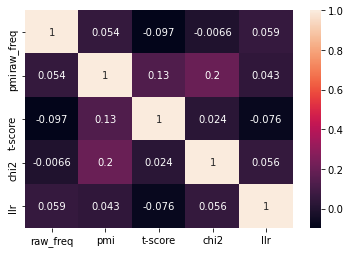

In [88]:
from scipy.stats import spearmanr
import seaborn as sns
%matplotlib inline
corr = spearmanr(rankings).correlation
sns.heatmap(corr, annot=True, xticklabels = list(rankings), yticklabels = list(rankings))

In [135]:
keywords_freq = []
keywords_llr = []
for i in trange(len(topic_names)):
    finder = BigramCollocationFinder.from_words(tokens_by_topic[i]) # класс для хранения и извлечения биграм
    finder.apply_freq_filter(3) # избавимся от биграм, которые встречаются реже трех раз
    raw_freq_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.raw_freq, N_best)] # выбираем топ-10 биграм по частоте 
    keywords_freq.append(raw_freq_ranking)
    llr_ranking = [' '. join(i) for i in finder.nbest(bigram_measures.likelihood_ratio, N_best)] # выбираем топ-10 биграм по отношению правдоподобия
    keywords_llr.append(llr_ranking)

100%|███████████████████████████████████████████████████████████████████████████████| 268/268 [00:00<00:00, 288.01it/s]


In [136]:
kw_freq = pd.DataFrame(keywords_freq).transpose()
kw_freq.columns = topic_names
kw_freq.to_excel('JCHAT-697 ключевые фразы под интент frequinces.xlsx')

kw_llr = pd.DataFrame(keywords_llr).transpose()
kw_llr.columns = topic_names
kw_llr.to_excel('JCHAT-697 ключевые фразы под интент likelihood ratio.xlsx')

### TextRank

* Вершины графа: слова
* Ребра графа могут определяться по следующим правилам:
    * Последовательные слова
    * Слова внутри левого или правого окна в $\pm$ 2-5 слов  

* Ребра могут быть взвешенные или невзвешенные, направленные или ненаправленные
* Любая мера центральности графа используется для определения важности вершин в графе. Слова, соответствующие наиболее важным вершинам, считаются ключевыми. 
* Если две соседние вершины оказываются важными, соответствующие им слова формируют ключевое словосочетание.

PageRank: $PR(V_i)=\frac{(1-d)}{N}+d \times \sum_{V_j \in In(V_i)} \frac{PR(V_j)}{|Out(V_j)|}$

![textrank](img/textrank.png)

Используем TextRank для извлечения ключевых слов:

In [89]:
%%time
from gensim.summarization import keywords
text = ' '.join(tokens_by_topic[topic_id])
kw = keywords(text)

Wall time: 1.76 s


Результаты:

In [130]:
kw

'позвонить связаться\nоператор перезвонить\nперезвоните\nмогу дозвониться прошу\nмнои\nзаказать звонок вашего\nобратныи звонка\nхочу\nпозвоните\nваш\nбанк\nспециалист\nпусть\nномер\nоператора\nперезвонит\nбанка\nпозвонит\nмныи\nвопрос\nнужно срочно\nкредит\nдень\nможете набрать\nсвяжитесь\nнужен\nзвонить\nтелефон\nпросьба\nсотрудник\nномеру\nсделать позвонили\nжду\nникто\nоператоры\nтеть\nмогли\nтрубку\nконсультация\nсвяжется\nтелефону\nвопрс\nденьги\nнужна\nочень\nтрубка\nперезвонил\nмогут\nсвязь\nдоговор\nминут\nпочему\nписать\nдиалог\nгорячую\nгорячеи линия\nзвонили\nпросто\nсрочныи\nспециалиста'

In [90]:
rankings = pd.DataFrame({'Text Rank': kw.split('\n')})
rankings.head(10)

,Text Rank
0,позвонить связаться
1,оператор перезвонить
2,перезвоните
3,могу дозвониться прошу
4,мнои
5,заказать звонок вашего
6,обратныи звонка
7,хочу
8,позвоните
9,ваш


In [131]:
keywords_textrank = []
for i in trange(len(tokens_by_topic)):
    text = ' '.join(tokens_by_topic[i])
    kw = keywords(text)
    keywords_textrank.append(kw.split('\n'))

100%|████████████████████████████████████████████████████████████████████████████████| 268/268 [00:43<00:00,  6.20it/s]


In [132]:
textrank = pd.DataFrame(keywords_textrank)
textrank.shape

(268, 261)

In [133]:
textrank = textrank.transpose()
textrank.columns = topic_names

In [134]:
textrank.to_excel('JCHAT-697 ключевые фразы под интент textrank.xlsx')

## Мера контрастности $tf-idf$



Частота терма [Luhn, 1957]:  Важность терма в тексте пропорциональная его частоте.

Обратная документная частота [Spaerck Jones, 1972]: Специфичность терма в тексте обратно пропорциональна числу текстов, в которых терм встречается. 

$tfidf(term, text, collection) = tf(term, document) \times idf(term, collection)$

Самая популярная комбинация весов: $f_{t,d} \times \log \frac{|D|}{n_t+1}$

Извлекаем ключевые слова по $tf-idf$:

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,3), min_df = 0)
tfidf_matrix =  tfidf.fit_transform([' '.join(tokens) for tokens in tokens_by_topic])
feature_names = tfidf.get_feature_names() 
tfidf_ranking = []
dense = tfidf_matrix.todense()

text = dense[topic_id].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
phrases = []
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:40]:
    tfidf_ranking.append(phrase)

In [124]:
tfidf_matrix

<268x382798 sparse matrix of type '<class 'numpy.float64'>'
	with 497763 stored elements in Compressed Sparse Row format>

In [126]:
tfidf_ranking_full = []
for i in trange(len(tokens_by_topic)):
    text = dense[i].tolist()[0]
    phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
    sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
#     phrase = []
    tfidf_ranking = []
    for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:40]:
        tfidf_ranking.append(phrase)
        
    tfidf_ranking_full.append(tfidf_ranking)

100%|████████████████████████████████████████████████████████████████████████████████| 268/268 [00:13<00:00, 20.03it/s]


In [127]:
len(topic_names)

268

In [128]:
topic_key_words = pd.DataFrame(tfidf_ranking_full).transpose()
topic_key_words.columns = topic_names
topic_key_words.head()

,"FIFTH &EVAL{code=_ret=setRowMode(ctx,'nochoice')_}","FIRST &EVAL{code=_ret=setRowMode(ctx,'nochoice')_}","FOURTH &EVAL{code=_ret=setRowMode(ctx,'nochoice')_}","NEGATIVE &EVAL{code=_ret=setRowMode(ctx,'nochoice')_}","NOTREPHRASE &EVAL{code=_ret=setRowMode(ctx,'*chat')_}","OTHER &EVAL{code=_ret=setRowMode(ctx,'nochoice')_}","POSITIVE &EVAL{code=_ret=setRowMode(ctx,'nochoice')_}","SECOND &EVAL{code=_ret=setRowMode(ctx,'nochoice')_}","THIRD &EVAL{code=_ret=setRowMode(ctx,'nochoice')_}",end,...,что считается покупкой для начисления процентов по карте «Польза»?,что такое push-уведомление?,что такое баллы «Польза»?,что такое досрочное или частичное погашение кредита?,что такое льготный период (grace period)?,что такое минимальный платёж по кредитной карте?,что такое неподтвержденная транзакция (операция)?,что такое остаток на счёте?,что такое финансовая защита?,"что умеет бот? &EVAL{code=_ret=setRowMode(ctx,'*chat')_}"
0,вариант,один,вариант,не другий,выше,вопрос,верный,два,вариант,спасибо,...,жкх,уведомление,баллы,такое досрочное,льготный,минимальный,неподтвержденные,такое остаток,защита,уметь
1,пять,вариант,вар вариант четвереть,не не,не вопрос,не поняли вопрос,верно,два два,вариант три,заранее спасибо спасибо,...,оплата,уведомления,такое,такое досрочное погашение,льготный период,минимальный платёж,неподтвержденные операции,остаток,такое финансовая,уметь уметь
2,вариант пять,вариант один,вариант четвереть,не,вопрос,не,верный верно,вариант,вариант три третие,зараный жду,...,оплата жкх,уведомление такое,такое баллы,такое,период,минимальный плата,операция,значит остаток,финансовая,уметь умеет
3,вар вариант пять,вариант один первый,вариант четвереть четвертый,другий,вопрос ответ,поняли вопрос,вс верный верно,вариант два,третие вариант,зараный жду ответ,...,услуг,такое,балл,погашение такое,период такое,такое минимальный,операции,остаток счёт,финансовая защита,уметь уметь уметь
4,вариант пять пятёрка,вариант первый,четвереть,не другий не,не вопрос ответ,вариант,вс верный,вариант два два,третие вариант вариант,спасибо зараный,...,покупка,такое уведомления,балл такое,досрочное,период льготный период,значит минимальный,неподтвержденные операция,остаток сч,такое финансовая защита,умеет


In [129]:
topic_key_words.to_excel('JCHAT-697 ключевые фразы под интент.xlsx')

In [94]:
feature_names[:10]

['аа',
 'аа алексей',
 'аа алексей понятный',
 'аа не',
 'аа не могу',
 'аа оплатить',
 'аа оплатить услуга',
 'аас',
 'аас счёт',
 'аас счёт счет']

Результаты:

In [95]:
rankings = pd.DataFrame({'tf-idf': tfidf_ranking})
rankings.head(10)

,tf-idf
0,перезвонить
1,обратный
2,позвонить
3,звонок
4,звонка
5,заказать
6,обратный звонка
7,дозвониться
8,заказать обратный
9,связаться


# Векторная модель 

|           | $d_1$      | $d_2$      | $\ldots$ | $d_{D}$    |
|-----------|------------|------------|----------|--------------|
| $w_1$     | $f_{11}$   | $f_{12}$   |          | $f_{1D}$   |
| $w_2$     | $f_{21}$   | $f_{22}$   |          | $f_{2D}$   |
| $\ldots$  |            |            |          |            |
| $w_{|V|}$ | $f_{V1}$ | $f_{V2}$ |          | $f_{VD}$ |


Косинусная мера близости в векторной модели [Salton et. al, 1975]: 
$ \cos(d_i, d_j) = \frac {d_i \times d_j}{||d_i||||d_j||} = \frac{\sum_k f_{ki} \times f_{kj}} {\sqrt{(\sum_k f_{ki})^2} \sqrt{(\sum_k f_{kj})^2}}$


Если вектора нормированы на длину $||d_i|| = ||d_j|| = 1$, $ \cos(d_i, d_j) = d_i \times d_j$

## Вычисление сходства и Gensim

Представление данных в Gensim словарем и корпусом:

In [97]:
from gensim.corpora import *
df.sort_values(by=['intent'], inplace = True)




corpus_sample_train = pd.DataFrame(columns=df.columns)


for cl in df['intent'].unique():
    corpus_sample = df[df['intent']==cl]
#     if len(corpus_sample) > 100:
#         sample = corpus_sample.iloc[:101,:]
#         sample.text = sample.text.str.lower()
#         sample.text = sample.text.apply(words_only)
#         sample.text = sample.text.apply(remove_stopwords) 
#         sample.text = sample.text.apply(lemmatize)
#         sample.text = sample.text.apply(remove_stoplemmas) 
    if len(sample.text.unique())==1:
        continue
    
    corpus_sample_train = corpus_sample_train.append(sample)


texts = [df.text.iloc[i].split() for i in range(len(corpus_sample_train))]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

Вычисление сходства по косинусной мере на векторах $tf-idf$:

In [98]:
%%time
from gensim.models import  *
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

Wall time: 35.9 ms


In [99]:
from gensim import similarities

index = similarities.MatrixSimilarity(tfidf[corpus])
sims = index[corpus_tfidf]

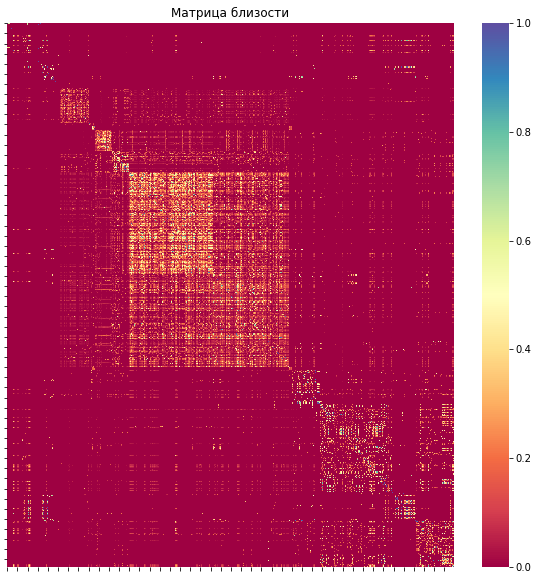

In [100]:
from pylab import pcolor, show, colorbar, xticks, yticks
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10,10))


sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[],yticklabels=[])

plt.title("Матрица близости")
plt.show()

In [101]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import *

vectors = TfidfVectorizer().fit_transform(df.text)
X_reduced = TruncatedSVD(n_components=5, random_state=0).fit_transform(vectors)
X_embedded = TSNE(n_components=2, perplexity=5, verbose=0).fit_transform(X_reduced)

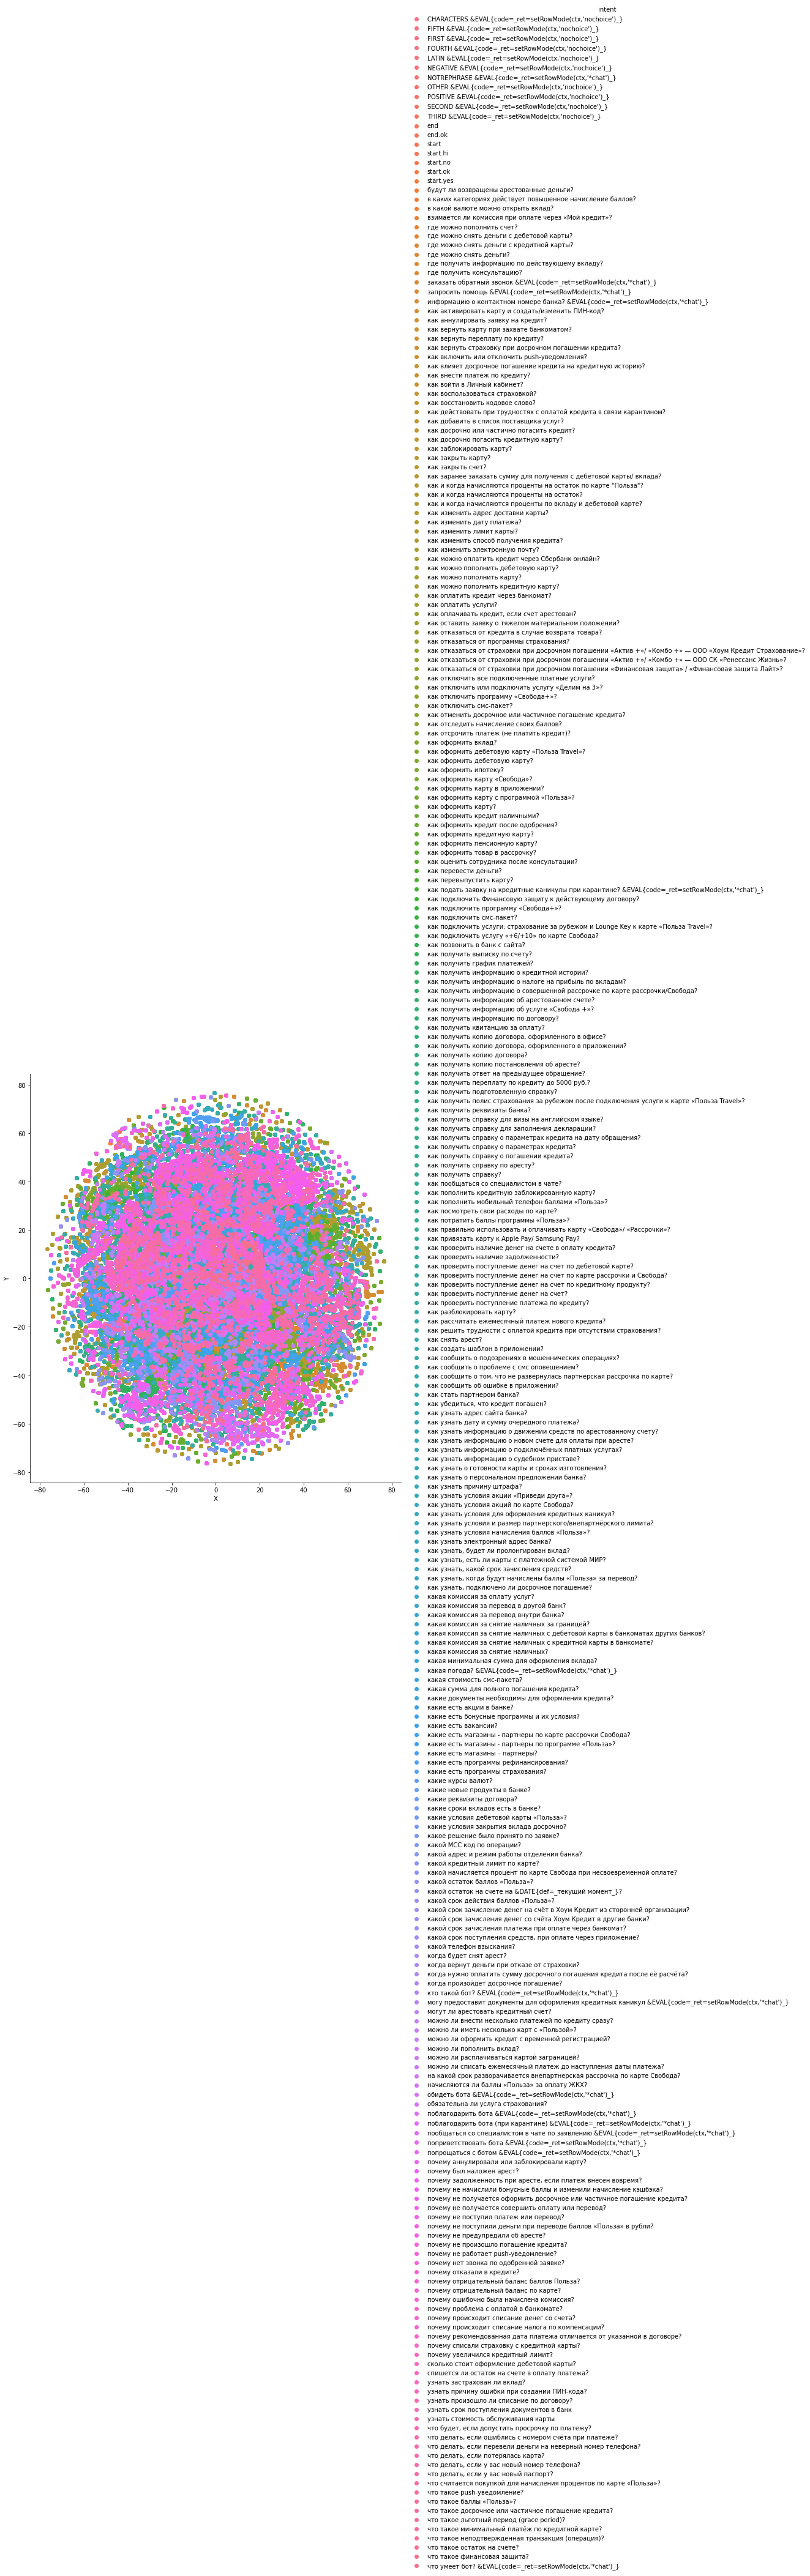

In [104]:
vis_df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'intent' : df['intent']})
sns.FacetGrid(vis_df, hue="intent", size=10).map(plt.scatter, "X", "Y").add_legend()